In [1]:
import h5py
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf

import os
import sys
# sys.path.insert(1, os.path.join(sys.path[0], '..'))
os.chdir('..')

In [2]:
# load dataset
dataset_path = 'data/nyu_depth_v2_labeled.mat'
f = h5py.File(dataset_path)
images = f['images']
depths = f['depths']

In [3]:
print('images: %s\ndepths: %s' %(images.shape, depths.shape))

images: (1449, 3, 640, 480)
depths: (1449, 640, 480)


In [4]:
print(np.mean(images), np.std(images))

(109.11757544714746, 76.668118781501477)


In [5]:
print(np.mean(depths), np.std(depths))

(2.7963083, 1.3860533)


(480, 640)
depths: min = 1.7986, max = 3.61564, mean = 2.87957


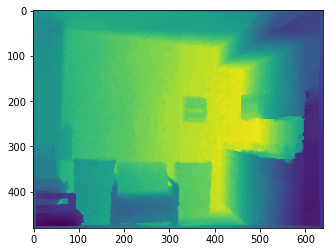

In [5]:
dep = depths[0].transpose()
print(dep.shape)
print('depths: min = %s, max = %s, mean = %s' % (np.min(dep), np.max(dep), np.mean(dep)))
plt.imshow(dep)
plt.show()

In [7]:
dep.dtype

dtype('float32')

In [29]:
np.save(('%s/%05d' % ('output', 29)), dep)

In [9]:
dep_load = np.load('dep.npy')

In [10]:
np.isclose(dep, dep_load)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [5]:
print('depths: min = %s, max = %s, mean = %s' % (np.min(depths), np.max(depths), np.mean(depths)))

depths: min = 0.7133, max = 9.99547, mean = 2.79631


(3, 640, 480)
(480, 640, 3)


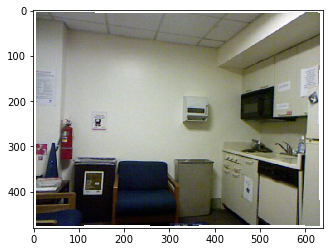

In [23]:
im = images[0]
print(im.shape)
im_ = im.transpose(2,1,0)
print(im_.shape)
plt.imshow(im_)
plt.show()

In [31]:
print('images: min = %s, max = %s, mean = %s' % (np.min(images), np.max(images), np.mean(images)))

images: min = 0, max = 255, mean = 109.117575447


In [24]:
rgb2 = im_[ 45:471, 41:601, : ];
depths2 = dep[ 45:471, 41:601 ];

In [25]:
print(rgb2.shape)
print(depths2.shape)

(426, 560, 3)
(426, 560)


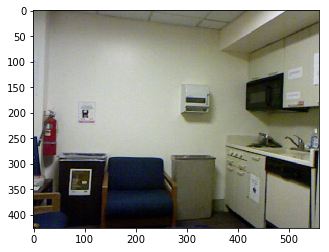

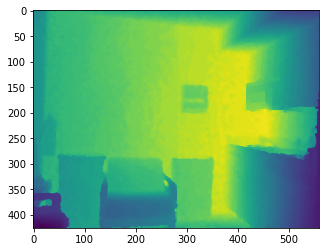

In [26]:
plt.imshow(rgb2)
plt.show()
plt.imshow(depths2)
plt.show()

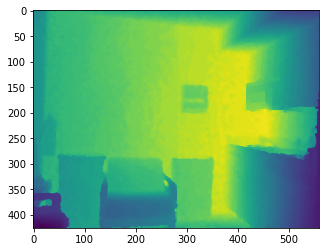

(426, 560)


In [8]:
dep = np.load('data/nyu_datasets/00000.npy')
plt.imshow(dep)
plt.show()
print(dep.shape)

In [43]:
a = np.random.rand(2,2)
a = a.astype('float32')
print(a.dtype)
# np.save('tmp.npy', a)
a.tofile('tmp.bin')

float32


In [44]:
sess = tf.Session()
d = tf.read_file('tmp.bin')
dec = tf.decode_raw(d, tf.float32)
val = sess.run(dec)
print(val)

[ 0.79900819  0.71438873  0.73418272  0.81174099]


(69312,)
(228, 304)


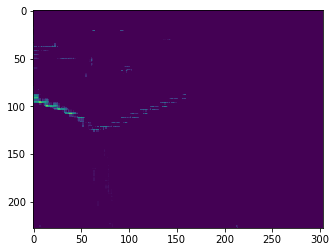

In [19]:
img = np.fromfile('220717/train/output/predict_00000_00000/00000.bin', dtype=np.float32)
print(img.shape)
im = img.reshape([228, 304])
print(im.shape)
plt.imshow(im)
plt.show()

In [20]:
print('image: min = %s, max = %s, mean = %s' % (np.min(img), np.max(img), np.mean(img)))

image: min = 0.0, max = 2.32393, mean = 0.00604259


(228, 304)


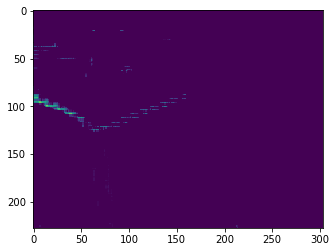

In [21]:
if np.max(im) != 0:
    ra_depth = (im/np.max(im))*255.0
else:
    ra_depth = im*255.0
print(ra_depth.shape)
depth_pil = Image.fromarray(np.uint8(ra_depth), mode="L")
plt.imshow(depth_pil)
plt.show()

(156600,)


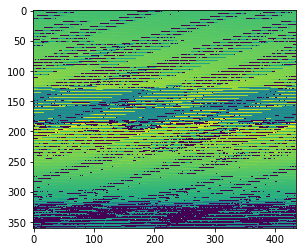

In [2]:
sess = tf.Session()
d = tf.read_file('./data/human_dataset/00000.bin')
dec = tf.decode_raw(d, tf.float32)
val = sess.run(dec)
print(val.shape)
im = np.reshape(val, (360, 435))
plt.imshow(im)
plt.show()

shape: (435, 360) type: float64


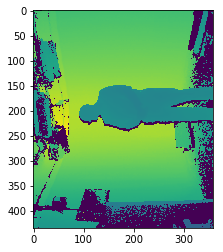

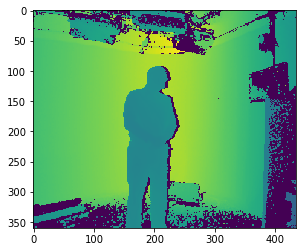

In [11]:
f = h5py.File('/home/rayner/kinect/depth.mat')
arr = f['res'][()]
print('shape: {} type: {}'.format(arr.shape, arr.dtype))
plt.imshow(arr)
plt.show()
# arr = np.reshape(arr, (360, 435))
arr = arr.transpose(1, 0)
plt.imshow(arr)
plt.show()

In [55]:
# train_dirs = [1, 2, 6, 8, 9, 13, 14, 15, 42, 43, 55, 81, 83, 86, 115, 117, 118]
# test_dirs = [3, 4, 30, 33]

# train_dirs = [1, 2, 3, 4]
train_dirs = [1, 2, 6, 8]
test_dirs = [5, 6]

# base = '/mnt/sdb1/shared/test'
base = '/mnt/sdb1/shared'

In [28]:
[[y for y in os.listdir(os.path.join(base, 'depth', str(x), 'aligned')) if y.endswith('.png')] for x in train_dirs]

[['10.png', '9.png', '6.png', '8.png', '0.png'],
 ['6.png', '0.png'],
 ['6.png', '0.png'],
 ['6.png', '8.png', '7.png', '0.png']]

In [56]:
lens = [len([y for y in os.listdir(os.path.join(base, 'depth', str(x), 'aligned')) if y.endswith('.png')]) for x in train_dirs]
lens

[43948, 47330, 89827, 44073]

In [54]:
[os.listdir(os.path.join(base, 'RGB', str(x), 'crops')) for x in train_dirs]

[['1.jpg', '6.jpg'],
 ['1.jpg', '6.jpg'],
 ['1.jpg', '6.jpg'],
 ['1.jpg', '6.jpg']]

In [63]:
from random import sample

try:
    train_files = [sample(xrange(0,x), 3) for x in lens]
except ValueError:
    print('Sample size exceeded population size.')
    
print train_files

[[170, 30935, 5609], [31343, 36559, 13691], [57715, 54086, 6757], [24555, 2723, 28540]]


In [64]:
train_dirs, train_files

([1, 2, 6, 8],
 [[170, 30935, 5609],
  [31343, 36559, 13691],
  [57715, 54086, 6757],
  [24555, 2723, 28540]])

In [72]:
# depths starting from 0.png, are aligned to RGB starting from 1.jpg
trains = [(os.path.join(base, 'depth', str(directory), 'aligned', str(f) + '.png'), 
 os.path.join(base, 'RGB', str(directory), 'crops', str(f+1) + '.jpg'))
 for (directory, files) in zip(train_dirs, train_files)
 for f in files
 if os.path.exists(os.path.join(base, 'depth', str(directory), 'aligned', str(f) + '.png')) and
 os.path.exists(os.path.join(base, 'RGB', str(directory), 'crops', str(f+1) + '.jpg'))]
trains

[('/mnt/sdb1/shared/depth/1/aligned/170.png',
  '/mnt/sdb1/shared/RGB/1/crops/171.jpg'),
 ('/mnt/sdb1/shared/depth/1/aligned/30935.png',
  '/mnt/sdb1/shared/RGB/1/crops/30936.jpg'),
 ('/mnt/sdb1/shared/depth/1/aligned/5609.png',
  '/mnt/sdb1/shared/RGB/1/crops/5610.jpg'),
 ('/mnt/sdb1/shared/depth/2/aligned/31343.png',
  '/mnt/sdb1/shared/RGB/2/crops/31344.jpg'),
 ('/mnt/sdb1/shared/depth/2/aligned/36559.png',
  '/mnt/sdb1/shared/RGB/2/crops/36560.jpg'),
 ('/mnt/sdb1/shared/depth/2/aligned/13691.png',
  '/mnt/sdb1/shared/RGB/2/crops/13692.jpg'),
 ('/mnt/sdb1/shared/depth/6/aligned/57715.png',
  '/mnt/sdb1/shared/RGB/6/crops/57716.jpg'),
 ('/mnt/sdb1/shared/depth/6/aligned/54086.png',
  '/mnt/sdb1/shared/RGB/6/crops/54087.jpg'),
 ('/mnt/sdb1/shared/depth/6/aligned/6757.png',
  '/mnt/sdb1/shared/RGB/6/crops/6758.jpg'),
 ('/mnt/sdb1/shared/depth/8/aligned/24555.png',
  '/mnt/sdb1/shared/RGB/8/crops/24556.jpg'),
 ('/mnt/sdb1/shared/depth/8/aligned/2723.png',
  '/mnt/sdb1/shared/RGB/8/crops